# Investment Portfolio Analysis

### Author: Toni Esteves
This Project is from the coursera course: Investment Strategies and Portfolio Analysis, from Rice University

## Week 2: Quantitative Risk Assessment

In this module, we focus on constructing return-to-risk measures in order to compare investments in terms of their desirability. You are going to learn several different ways to calculate Risk-Adjusted Return Measures for an actively managed fund and understand how these measures differ from each other.

### Lecture Notes

#### General Notation
$$r_i-r_f = \alpha_i + \beta_i (r_b - r_f) + \epsilon_i$$
- $r_i$: return on asset i
- $r_f$: risk-free rate
- $r_b$: return on benchmark portfolio (in CAPM = market portfolio)
- $\alpha_i,\beta_i$: wrt the benchmark portfolio
- $\epsilon_i$: residual return on asset i
- $\sigma_i = \sigma(r_i-r_f)$
- $\sigma_b = \sigma(r_b-r_f)$
- $\sigma_\epsilon = \sigma(\epsilon_i)$

#### 1. Sharp Ratio 
$$SR = {\sf sharp\ ratio} = \frac{{\sf risk\ premium}}{\sigma_p} = \frac{E(r_p-r_f)}{\sigma_p} = \frac{\bar{r_p}-\bar{r_f}}{\sigma_p}$$
- In the hypothetical world of CAPM, the maximum Sharpe ratio is that of the market portfolio. 
- In the real world, Sharpe ratio provides a basis to rank portfolios.
- Sharpe ratio is generally not used to evaluate the performance individual securities because it does not account for correlation between securities.
- Sharpe ratio is a measure of reward to variability. 
- $SR_{annual} = SR_{month} * \sqrt{12}$

#### 2. Sortino Ratio
$$SR_{down} = {\sf sortino\ ratio} = \frac{E(r_p-\tau)}{\sigma_{down}}$$
- Sortino ratio is an extension of the Sharpe ratio that focuses on the downside risk.

#### 3. Treynor’s Measure
$$TR_{p} = {\sf treynor\ ratio} = \frac{E(r_p-r_f)}{\beta_p}$$
- Like the Sharpe ratio, Treynor’s measure gives the excess return per unit of risk, but it uses systematic risk instead of total risk.
- Not clear how to apply if there are multiple risk factors.
- Treynor measure is a better measure for comparing assets that may be combined into portfolios.

#### 4. Jensen’s alpha
- Alpha is a measure of the risk-adjusted excess return: Benchmark alpha, CAPM alpha, Multi-factor alpha
 
- Jensen’s alpha is the maximum you should be willing to compensate a portfolio manager. For example, if a fund has a pre-expense alpha of 0.0015 (monthly), this means we should be willing to pay up to 0.15% per month, or 1.8% per year. Alternatively, were you to compensate the manager this much, your after-expense alpha would be zero.
 
- Jensen’s alpha is the excess return not explained by the CAPM (or your favorite risk-based model). To generate outperformance, we must have positive alpha’s.

#### 5. Appraisal Ratio
$$AR = {\sf appraisal\ ratio} = \frac{\alpha_p}{\sigma_{p,\epsilon}}$$
- $\alpha_p$: Jensen’s alpha; $\sigma_{p,\epsilon}$ = residual risk = idiosyncratic risk of the portfolio
- Jensen’s alpha does not adjust for the amount of idiosnycratic risk in the portfolio.
- Appraisal ratio represents the expected abnormal return per unit of systematic risk taken.

#### 6. Information Ratio
$$IR = {\sf information\ ratio} = \frac{E(\bar{r}_p-\bar{r}_b)}{\sigma(\bar{r}_p-\bar{r}_b)} $$
- $\bar{r}_p$: average return on the portfolio
- $\bar{r}_b$: average return on the benchmark
- $\sigma(\bar{r}_p-\bar{r}_b)$ = volatility of the difference = Tracking Error
- The appraisal ratio and information ratio are both measures of benefit and cost – how much abnormal return for how much residual risk, where residual risk is $\sigma(\epsilon_i)$

#### 7. When are these measures appropriate to use?
- **Sharpe Ratio is more appropriate for evaluating entire portfolios, rather than sub-portfolios or individual stocks**. Suppose the investor can choose only one fund and choosing among different funds, then choose the one with the highest Sharpe ratio.
 
- **The appraisal ratio and the information ratio are informative if the focus is on active management relative to a benchmark** – effectively they are measures of active reward to active risk. The basis for the risk adjustment is residual risk or tracking error.
 
- **Jensen’s alpha and Treynor measure are better suited for evaluating individual stocks or sub-portfolios**. They use systematic risk as the basis for adjusting returns.

- If the **underlying return distribution is asymmetric or skewed, or if the investor has a particular return target that defines downside risk**, then **Sortino ratio** is a good alternative to **Sharpe ratio**.

#### 8. Important Caveat and Summary
- Beware of estimation error!
- Averages, standard deviations, and regressions are notoriously susceptible to outliers.
- Distribution of future returns might not be the same as past returns.
- It is advisable that you use more than one single measure.
- The objective is to separate excess returns due to stock selection/asset allocation skill from higher returns due to compensation for risk.

In [20]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt

In [75]:
# A: Returns on Portfolio A
# B: Returns on Portfolio B
# M: Market Returns
data = pd.read_csv("../data/quiz_data_3.csv", sep=';')
data.head()

,Month,A,B,M
0,1,0.67,3.72,-1.56
1,2,1.69,3.31,-2.08
2,3,12.37,7.26,3.67
3,4,0.32,0.15,-6.14
4,5,3.65,4.17,-0.91


In [76]:
# Excess Returns over the risk free rate!
data.describe()

,Month,A,B,M
count,36.000000,36.000000,36.000000,36.000000
mean,18.500000,1.561667,4.660000,0.243333
std,10.535654,6.563269,3.021299,4.339112
min,1.000000,-14.550000,-3.520000,-11.000000
25%,9.750000,-1.337500,3.287500,-1.685000
50%,18.500000,1.615000,4.870000,0.890000
75%,27.250000,4.547500,6.297500,2.162500
max,36.000000,16.910000,10.460000,8.640000


In [77]:
def risk_assessment(x, y):
    ''' 
    x is market return, 
    y is portfolio return
    '''
    sharp_ratio = y.mean() / y.std()
    corr        = np.corrcoef(x, y)[0][1]
    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x, y)

    alpha           = intercept
    beta            = slope
    r2              = r_value**2
    treynor_measure = y.mean() / beta

    epsilon         = y - (beta*x + alpha)
    residual_risk   = epsilon.std()
    appraisal_ratio = alpha / residual_risk

    excess_return_over_market = y - x
    tracking_error            = excess_return_over_market.std()
    information_ratio         = excess_return_over_market.mean() / tracking_error
    
    print(f"Average Return:                             {y.mean():.3f}")
    print(f"Return Volatility:                          {y.std():.3f}")
    print(f"Sharp Ratio:                                {sharp_ratio:.3f}")
    print(f"CAPM Alpha:                                 {alpha:.3f}")
    print(f"CAPM Beta:                                  {beta:.3f}")
    print(f"corr:                                       {corr:.3f}")
    print(f"r2:                                         {r2:.3f}")
    print(f"Treynor's measure:                          {treynor_measure:.3f}")
    print(f"Residual Risk (measure idiosyncratic risk): {residual_risk:.3f}")
    print(f"Appraisal Ratio:                            {appraisal_ratio:.3f}")
    print(f"Information Ratio:                          {information_ratio:.3f}")

    _ = plt.plot(x, y, 'o', label='Original data', markersize=5)
    _ = plt.grid()
    _ = plt.plot(x, beta*x + alpha, 'r', label='Fitted line')
    _ = plt.legend()
    plt.show()

## alternative methods
# A = np.vstack([x, np.ones(len(x))]).T
# beta, alpha = np.linalg.lstsq(A, y, rcond=None)[0]
#
# corr = np.corrcoef(x, y)[0][1]
# std_a = y.std()
# std_m = x.std()
# beta = corr * std_a / std_m
# treynor_measure = y.mean() / beta

<Axes: >

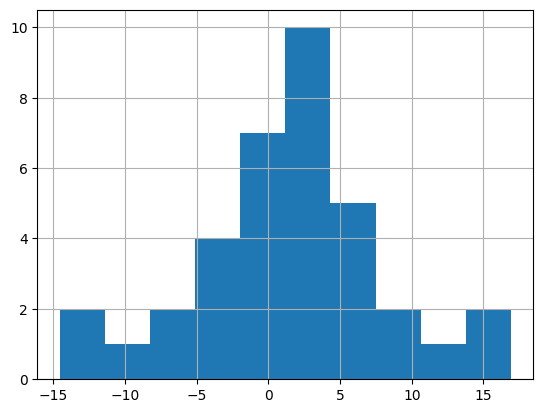

In [78]:
data['A'].hist()

<Axes: >

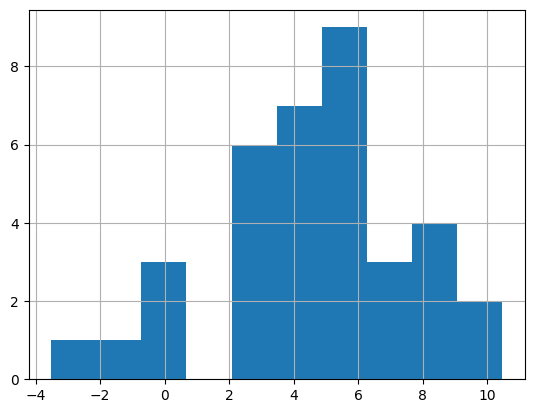

In [79]:
data['B'].hist()

Average Return:                             1.562
Return Volatility:                          6.563
Sharp Ratio:                                0.238
CAPM Alpha:                                 1.247
CAPM Beta:                                  1.295
corr:                                       0.856
r2:                                         0.732
Treynor's measure:                          1.206
Residual Risk (measure idiosyncratic risk): 3.395
Appraisal Ratio:                            0.367
Information Ratio:                          0.363


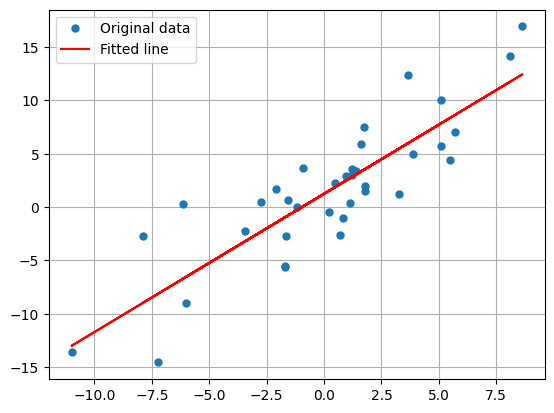

In [80]:
risk_assessment(data['M'], data['A'])

Average Return:                             4.660
Return Volatility:                          3.021
Sharp Ratio:                                1.542
CAPM Alpha:                                 4.491
CAPM Beta:                                  0.694
corr:                                       0.996
r2:                                         0.993
Treynor's measure:                          6.718
Residual Risk (measure idiosyncratic risk): 0.260
Appraisal Ratio:                            17.251
Information Ratio:                          3.261


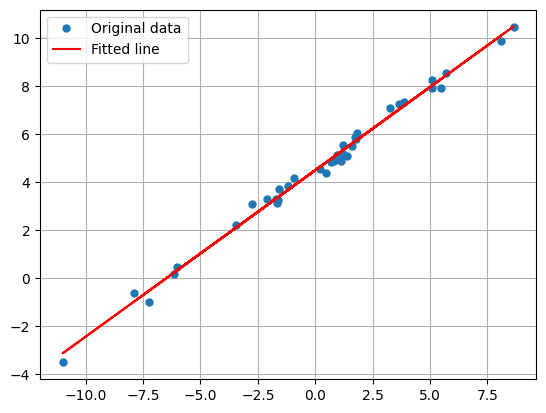

In [81]:
risk_assessment(data['M'], data['B'])

### Conclusion
- **Q:** Which portfolio is considered more aggressive? 
- **A:** B

- **Q:** Which portfolio is more diversified? In other words, which portfolio has less idiosyncratic risk? 
- **A:** A

- **Q:** If you were to choose one single portfolio to invest all of your wealth in, which one would you choose? 
- **A:** A

- **Q:** Suppose you are already holding a passive index fund, and you are choosing between A and B to add to your portfolio. Which portfolio is more attractive? 
- **A:** A